# import necessary modules

In [13]:
# cPickle in python 3.X is replace by _pickle
import _pickle as cPickle
import numpy as np
import matplotlib.pyplot as plt

# 1. first step----load data

In [6]:
Xd = cPickle.load(open("RML2016.10a_dict.dat",'rb'),encoding='latin')
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

## The data show
* The Xd is the orgin data load from *RML2016.10a_dict.dat* is the dictionary type,represent by `(mod,snr)` such as `('QPSK', 2)`
* The modulation is arrange by `8PSK`,`AM-DSB`,`AM-SSB`,`BPSK`,`CPFSK`,`GFSK`,`PAM4`,`QAM16`,`QAM64`,`QPSK` and `WBFM`
* The Signal to noise ratio(snr) is range from -20 to 18,step 2 
* The X shape is: 
``` pyhton 
X.shape = (22000,2,128)
```
------
Accroding the [generate_RML2016.10a.py](https://github.com/radioML/dataset/blob/master/generate_RML2016.10a.py) ,`X[_][0]`is the Real of signal,`X[_][1]`is the Imaginary of signal
``` python
dataset[(mod_type.modname, snr)][modvec_indx,0,:] = np.real(sampled_vector)
dataset[(mod_type.modname, snr)][modvec_indx,1,:] = np.imag(sampled_vector)
```
```python
len(Xd.keys()) = 220
```
so, per moudlation have 1000 samples, such as `(8PSK,-20)`is `X[0:999]`,and so on
-----
Use the `matplotlib` to plot the real and Imaginary of signal in time domain:
``` python
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(X[0][0])
plt.title('Real')
plt.subplot(122)
plt.plot(X[0][1])
#plt.yticks([])
plt.title('Imaginary')
plt.show()
```
![](images/plot_signal.png)

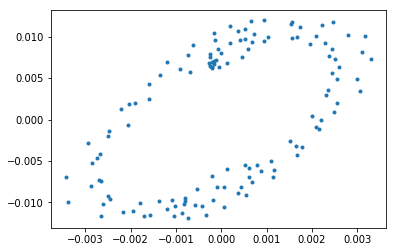

In [92]:
plt.plot(X[20*999*4][0],X[20*999*4][1],'.')